In [1]:
import os, sys
current_dir = os.path.dirname(os.getcwd())
up_dir = os.path.dirname(current_dir)
sys.path.append(current_dir)
sys.path.append(up_dir)
from common_imports import *

/home/cilem/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
base = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda", torch.float16)

refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
    ).to("cuda", torch.float16)

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  8.54it/s]


In [6]:
prompt = "a painting of colorful flowers on a blue background, inspired by Max Slevogt, fabrics textiles, trending on artstattion, seamless pattern, drawing technique Oil Painting, smooth, colorful, vibrant colors, elegant, beautiful, natural lighting, beautiful lighting, masterpiece, high resolution, 16k, vivid colors, painting, bright colors, bloom, flowers, vintage"
negative_prompt = "lowres, extra digit, fewer digits, cropped, worst quality, low quality, text, word, icon, logo, hands, fingers, feet, face, eyes, anime, women, man, nude"
init_image = Image.open("/home/cilem/playground/ai-playground/media/training_images/100_lora paisey_1024/19-5539.png").convert("RGB")

100%|██████████| 10/10 [00:02<00:00,  3.51it/s]


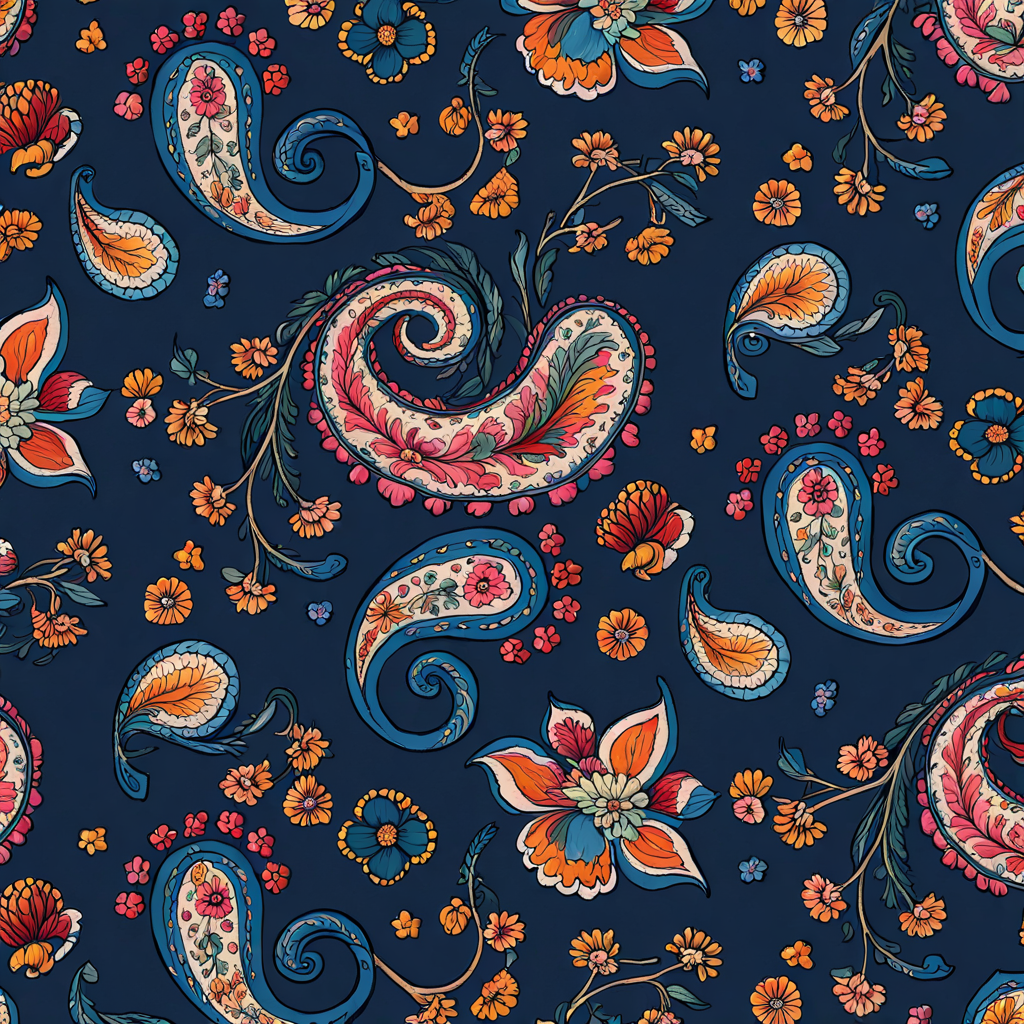

In [7]:
seed = np.random.randint(0, np.iinfo(np.int64).max)
generator = torch.Generator().manual_seed(seed)

output = base(image=init_image,
              prompt=prompt,
              negative_prompt=negative_prompt,
              num_inference_steps=50,
              strength=0.5,
              denoising_end=0.8,
              generator=generator,
              guidance_scale=15,
              output_type="latent").images

output = refiner(image=output,
                prompt=prompt,
                negative_prompt=negative_prompt,
                num_inference_steps=50,
                strength=0.5,
                denoising_start=0.8,
                generator=generator,
                guidance_scale=15).images[0]

display(output)